# Univariate linear regression


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

crime_df = pd.read_csv("crime_data.csv")
crime_df.head()

,X1,X2,X3,X4,X5,X6,X7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


In [2]:
crime_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'], dtype='object')

In [3]:
crime_df = crime_df[['X1', 'X3']]
crime_df.columns = ['crime_rate_mil', 'police_funding']

In [4]:
X = np.array(crime_df['police_funding']).reshape(-1,1)
y = np.array(crime_df['crime_rate_mil']). reshape(-1,1)

#1. train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

In [5]:
#2. create the model
regression_df = LinearRegression()
regression_df.fit(X_train, y_train)

LinearRegression()

In [6]:
#3. predict new values

y_pred = regression_df.predict(X_test)
y_pred

array([[1020.54571631],
       [ 641.96405651],
       [ 652.19599327],
       [ 795.44310778],
       [ 549.87662575],
       [ 713.58761377],
       [ 815.90698128],
       [ 795.44310778],
       [ 662.42793002],
       [ 928.45828555],
       [ 682.89180352],
       [ 713.58761377],
       [1225.18445133],
       [ 744.28342403],
       [ 907.99441204]])

In [7]:
# performance is from 0 to 1
# this is also r squared; just a different way of doing it
accuracy_score = regression_df.score(X_test, y_test)
print(accuracy_score)

0.4556879319920141


In [8]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4556879319920141

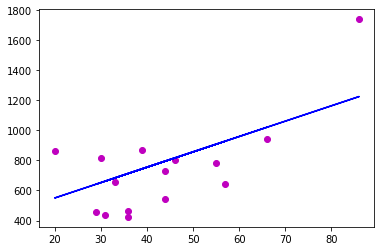

In [9]:
#this is test data based on test_train split
plt.scatter(X_test, y_test, color ='m')
plt.plot(X_test, y_pred, color = 'b')
plt.show()

# KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [11]:
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# drop the outcome
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Standardization - tranform values so that the mean is 0 and sd is 1
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print(y_predict)

[1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0]


In [15]:
print(knn.score(X_test, y_test))

0.7359307359307359


In [16]:
diabetes_pred_df = pd.DataFrame(X_test, columns = diabetes_df.columns[0:8])
diabetes_pred_df['Actual_Outcome'] = y_test.tolist()
diabetes_pred_df['Predicted_Outcome'] = y_predict.tolist()

diabetes_pred_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Actual_Outcome,Predicted_Outcome
0,-0.289482,1.565042,0.635322,1.723157,3.013534,0.819028,4.989458,-0.772020,1,1
1,0.299684,0.693101,0.635322,0.259496,1.560934,-0.044201,-0.110212,1.970341,1,0
2,-0.289482,1.595109,-0.755762,-0.006624,0.826564,0.077191,0.316526,0.142101,1,1
3,-0.878648,-0.148773,-0.060220,0.392556,-0.739016,-0.664647,-0.860787,-1.104427,0,0
4,-0.878648,-1.261249,0.519398,0.192966,-0.440426,-0.934406,0.286261,-1.021325,0,0


In [19]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, y_predict)

array([[130,  12],
       [ 49,  40]])